In [45]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist, pos_tag

In [2]:
dataset = pd.read_csv("dataset.csv")

In [3]:
dataset.head()

,product_review,product_category
0,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,Beautifully made pants and on trend with the f...,Bottoms
2,I never would have given these pants a second ...,Bottoms
3,These pants are even better in person. the onl...,Bottoms
4,The silhouette and length of this skirt and le...,Bottoms


In [4]:
dataset.shape

(3376, 2)

In [19]:
dataset["product_review"]

0       i love love love this jumpsuit it s fun flirty...
1       beautifully made pants and on trend with the f...
2       i never would have given these pants a second ...
3       these pants are even better in person the only...
4       the silhouette and length of this skirt and le...
                              ...                        
3371    this is a nice everyday jacket to wear with dr...
3372    almost perfect this jacket doesn t have that w...
3373    i really like the soft and very wearability of...
3374    i need to remember that this brand runs small ...
3375    i had my eye on this coat for so long when i s...
Name: product_review, Length: 3376, dtype: object

In [20]:
dataset.product_review[0]

'i love love love this jumpsuit it s fun flirty and fabulous every time i wear it i get nothing but great compliments '

In [6]:
dataset["product_category"].value_counts()

product_category
Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: count, dtype: int64

In [7]:
dataset["product_review"] = dataset["product_review"].str.lower()

In [8]:
dataset.head()

,product_review,product_category
0,"i love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person. the onl...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


In [9]:
def remove_punct(s):
    s = re.sub(r"\W", " ", s)
    return re.sub(r"\s+", " ", s)    

In [10]:
dataset["product_review"] = dataset["product_review"].apply(remove_punct)

In [11]:
dataset.head()

,product_review,product_category
0,i love love love this jumpsuit it s fun flirty...,Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person the only...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


In [12]:
dataset["product_review_tokens"] = dataset["product_review"].apply(word_tokenize)

In [13]:
dataset.head()

,product_review,product_category,product_review_tokens
0,i love love love this jumpsuit it s fun flirty...,Bottoms,"[i, love, love, love, this, jumpsuit, it, s, f..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt..."


In [14]:
s_w = stopwords.words("english")

def remove_sw(tokens:list) -> list:
    return [w for w in tokens if w not in s_w]

In [15]:
dataset["product_review_tokens_cleaned"] = dataset["product_review_tokens"].apply(remove_sw)

In [16]:
dataset.head()

,product_review,product_category,product_review_tokens,product_review_tokens_cleaned
0,i love love love this jumpsuit it s fun flirty...,Bottoms,"[i, love, love, love, this, jumpsuit, it, s, f...","[love, love, love, jumpsuit, fun, flirty, fabu..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering..."


In [17]:
dataset["product_review_cleaned"] = dataset["product_review_tokens_cleaned"].apply(lambda x: " ".join(x))

In [18]:
dataset.head()

,product_review,product_category,product_review_tokens,product_review_tokens_cleaned,product_review_cleaned
0,i love love love this jumpsuit it s fun flirty...,Bottoms,"[i, love, love, love, this, jumpsuit, it, s, f...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


In [21]:
dataset["product_category"].value_counts()

product_category
Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: count, dtype: int64

In [25]:
dataset[dataset.product_category == "Tops"]["product_review_cleaned"]

2016    shirt flattering due adjustable front tie perf...
2017    aded basket hte last mintue see would look lik...
2018    took chance blouse glad crazy blouse photograp...
2019    love shirt first saw sure shirt dress since se...
2020    sweater comfy classic balances quirky hand kni...
                              ...                        
2691                  super cute buying another color tee
2692    nice top worn alone underneath sweater dressed...
2693    debated xs small ended small 100 cotton probab...
2694    love top thinking going need x large busty tri...
2695    shirt awesome absolutely love style shirt supe...
Name: product_review_cleaned, Length: 680, dtype: object

In [33]:
tokens_tops = []

for i in dataset[dataset.product_category == "Tops"]["product_review_tokens_cleaned"]:
    tokens_tops.append(i)

In [34]:
len(tokens_tops)

680

In [35]:
tokens_tops = []

for i in dataset[dataset.product_category == "Tops"]["product_review_tokens_cleaned"]:
    tokens_tops.extend(i)

In [36]:
len(tokens_tops)

18382

In [32]:
tokens_tops

['shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'leggings',
 'sleeveless',
 'pairs',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turns',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'xs',
 'hte',
 'msallet',
 'size',
 'bummer',
 'petite',
 'decided',
 'jkeep',
 'though',
 'said',
 'matvehd',
 'everything',
 'ejans',
 'pants',
 '3',
 'skirts',
 'waas',
 'trying',
 'kept',
 'oops',
 'took',
 'chance',
 'blouse',
 'glad',
 'crazy',
 'blouse',
 'photographed',
 'model',
 'paired',
 'whit',
 'white',
 'pants',
 'worked',
 'perfectly',
 'crisp',
 'clean',
 'would',
 'describe',
 'launders',
 'well',
 'fits',
 'great',
 'drape',
 'perfect',
 'wear',
 'tucked',
 'go',
 'wrong',
 'love',
 'shirt',
 'first',


In [39]:
dir(FreqDist(tokens_tops))

['B',
 'N',
 'Nr',
 '_N',
 '__add__',
 '__and__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__missing__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_cumulative_frequencies',
 '_keep_positive',
 'clear',
 'copy',
 'elements',
 'freq',
 'fromkeys',
 'get',
 'hapaxes',
 'items',
 'keys',
 'max',
 'most_common',
 'pformat',
 'plot',
 'pop',
 'popitem',
 'pprint',
 'r_Nr',
 'setdefault',
 'subtract',
 'tabulate',
 'total',
 'update',
 'values']

In [40]:
frecs = FreqDist(tokens_tops)

In [42]:
frecs.most_common(10)

[('love', 341),
 ('top', 337),
 ('wear', 234),
 ('great', 232),
 ('size', 215),
 ('shirt', 190),
 ('color', 186),
 ('fit', 169),
 ('perfect', 147),
 ('small', 145)]

In [46]:
pos_tag(dataset.product_review_tokens[0])

[('i', 'NN'),
 ('love', 'VBP'),
 ('love', 'NN'),
 ('love', 'NN'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('it', 'PRP'),
 ('s', 'VBZ'),
 ('fun', 'JJ'),
 ('flirty', 'NN'),
 ('and', 'CC'),
 ('fabulous', 'JJ'),
 ('every', 'DT'),
 ('time', 'NN'),
 ('i', 'NN'),
 ('wear', 'VBP'),
 ('it', 'PRP'),
 ('i', 'JJ'),
 ('get', 'VBP'),
 ('nothing', 'NN'),
 ('but', 'CC'),
 ('great', 'JJ'),
 ('compliments', 'NNS')]

In [47]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [48]:
dataset.head()

,product_review,product_category,product_review_tokens,product_review_tokens_cleaned,product_review_cleaned
0,i love love love this jumpsuit it s fun flirty...,Bottoms,"[i, love, love, love, this, jumpsuit, it, s, f...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


In [49]:
dataset["tokens_pos_tag"] = dataset.product_review_tokens.apply(pos_tag)

In [50]:
dataset.head()

,product_review,product_category,product_review_tokens,product_review_tokens_cleaned,product_review_cleaned,tokens_pos_tag
0,i love love love this jumpsuit it s fun flirty...,Bottoms,"[i, love, love, love, this, jumpsuit, it, s, f...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng..."


In [53]:
def extract_adj(tokens:list) -> list:
    adjs = []
    for t in tokens:
        if t[1] in ["JJ", "JJR", "JJS"]:
            adjs.append(t[0])

    return adjs
        # print(f"Token: {t[0]} | Etiqueta: {t[1]}")

In [55]:
dataset["adjectives"] = dataset.tokens_pos_tag.apply(extract_adj)

In [56]:
dataset.head()

,product_review,product_category,product_review_tokens,product_review_tokens_cleaned,product_review_cleaned,tokens_pos_tag,adjectives
0,i love love love this jumpsuit it s fun flirty...,Bottoms,"[i, love, love, love, this, jumpsuit, it, s, f...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fun, fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, worn, favorite, differe..."


In [59]:
adjs_tops = ""

for i in dataset[dataset.product_category == "Tops"]["adjectives"]:
    adjs_tops += " ".join(i) + " "

adjs_tops

'flattering due adjustable perfect cardigan last i pale gorgeous little hte ejans i glad i white crisp clean i great perfect wear wrong t sure white careful i great comfy classic quirky beautiful practical cropped boxy perfect longer camisole little warm thin small gorgeous unsnapped skinny true great casual flare grey back nice beautiful unique ordinary usual tight chest i cute plaid great local comfortable bad little dressier small black top comfortable comfortable good perfect roomy warm cute collar beautiful unique top small fit better super adorable favorite i small perfect soft comfortable unusual asymmetrical right visual little adorable i comfortable i feminine great dark perfect wish happy comfortable flattering comfortable light top lovely floral great white top happy top online little i little large petite longer regular perfect give soft comfortable short much uncomfortable doesn easier navy boxy whole cute more fabric i super read same specific petite weigh small perfect l

In [60]:
FreqDist(adjs_tops)

FreqDist({' ': 5023, 'e': 3070, 't': 2554, 'l': 2016, 'r': 1989, 'a': 1968, 'i': 1915, 'o': 1602, 's': 1362, 'u': 1071, ...})

In [64]:
from wordcloud import WordCloud

In [ ]:
# %pip install wordcloud

In [77]:
wc = WordCloud(height=500, width=500, background_color="white", colormap="gray", mask=)

In [66]:
dir(wc)

['__array__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_generated',
 '_draw_contour',
 '_get_bolean_mask',
 'background_color',
 'collocation_threshold',
 'collocations',
 'color_func',
 'colormap',
 'contour_color',
 'contour_width',
 'fit_words',
 'font_path',
 'font_step',
 'generate',
 'generate_from_frequencies',
 'generate_from_text',
 'height',
 'include_numbers',
 'margin',
 'mask',
 'max_font_size',
 'max_words',
 'min_font_size',
 'min_word_length',
 'mode',
 'normalize_plurals',
 'prefer_horizontal',
 'process_text',
 'random_state',
 'recolor',
 'regexp',
 'relative_scaling',
 'repeat',
 'scale',
 'stopwords',
 'to_array',
 't

In [70]:
type(wc)

wordcloud.wordcloud.WordCloud

In [71]:
from matplotlib import pyplot as plt

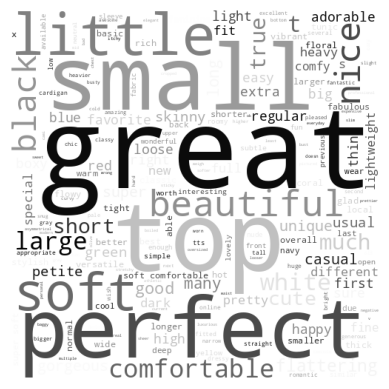

In [78]:
wc.generate(adjs_tops)
plt.imshow(wc)
plt.axis("off")
plt.show()